# Maximiere den Rand, aber soft

```{admonition} Lernziele
:class: important
* Sie kennen die Abkürzung **SVM** für **Support Vector Machines**.
* Sie kennen die Idee, bei Support Vector Machines den **Margin** (=
  Randabstand) zu maximieren.
* Sie können in eine Visualisierung der Daten die Stützvektoren einzeichnen und
  wissen, dass diese auf Englisch **Support Vectors** genannt werden.
* Sie wissen, dass ein harter Randabstand nur bei linear trennbaren Datensätzen
  möglich ist.
* Sie wissen, dass eigentlich nicht trennbare Datensätzen mit der Technik **Soft
  Margin** (= weicher Randabstand) dennoch klassifiziert werden können.
```

## Welche Trenn-Gerade soll es sein?

Mit Support Vactor Machines (SVM) wollen wir erneut binäre
Klassifikationsprobleme lösen. Bisher haben wir bereits das Perzeptron und das
logistische Regressionsmodell kennengelernt. Liegen nur wenige Datensätze vor,
so ist das logistische Regressionsmodell empfehlenswert. Bei größeren Mengen an
Trainingsdaten skaliert das SVM-Verfahren jedoch besser. Auch neigt es weniger
zu Overfitting. Daher lohnt es sich, Support Vector Machines anzusehen.

Warum es weniger zu Overfitting neigt und mit Ausreißern besser umgehen kann,
sehen wir bereits an der zugrundeliegenden Idee, die hinter dem Verfahren
steckt. Um das Basis-Konzept der SVMs zu erläutern, besorgen wir uns zunächst
künstliche Messdaten. Dazu verwenden wir die Funktion `make_blobs` aus dem
Scikit-Learn-Modul. Mehr Details zum Aufruf der Funktion finden Sie in der
[Scikit-Learn-Dokumentation/make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html?highlight=make+blobs#sklearn.datasets.make_blobs).

In [1]:
from sklearn.datasets import make_blobs

# generate artificial data
X, y = make_blobs(n_samples=60, centers=2, random_state=0, cluster_std=0.50)

print(X)
print(y)

/opt/homebrew/Caskroom/miniconda/base/envs/python310/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[[ 1.4726926   1.3480769 ]
 [ 0.5323772   3.31338909]
 [ 1.74265969  5.03846671]
 [ 1.72330962  4.2012082 ]
 [ 0.4519936   3.59377836]
 [ 1.84845803  0.52393625]
 [ 1.61986895  0.60823883]
 [ 1.62465468  1.85269614]
 [ 3.01673853  1.63792106]
 [ 2.23345072  1.25095024]
 [ 1.60161834  0.92363636]
 [ 0.802314    4.38196181]
 [ 2.11872357  1.09865834]
 [ 1.05374379  4.49286859]
 [ 0.16932115  4.19741719]
 [ 0.92466065  4.50908658]
 [ 1.42002502  1.38236201]
 [ 0.12313498  5.27917503]
 [ 1.85367905  1.5088862 ]
 [ 1.89949126  0.92574633]
 [ 0.96217896  4.51795326]
 [ 1.35678894  4.36462484]
 [ 0.72144399  4.08475018]
 [ 0.64003985  4.12401075]
 [ 2.99684287  0.22378413]
 [ 0.56969694  3.44064603]
 [ 0.78260667  4.15263595]
 [ 1.45131429  4.22810872]
 [-0.30022483  4.63059663]
 [ 1.59141542  4.90497725]
 [ 1.92126584  1.29889186]
 [ 2.14398059  0.69677319]
 [ 2.20438661  1.56085661]
 [ 0.99914934  4.2101954 ]
 [ 1.91004907  3.81514839]
 [ 1.19820169  4.47062449]
 [ 2.79939362  1.84560825]
 

Die Funktion `make_blobs` erzeugt standardmäßig zwei Input-Features, da die
Option `n_features` auf den Wert 2 voreingestellt ist, und einen Output, bei dem
die Labels entweder durch 0 oder 1 gekennzeichnet sind. Durch die Option
`random_state=0` wird der Zufall ausgeschaltet.

Wenn wir die Daten visualisieren, erhalten wir folgenden Plot.

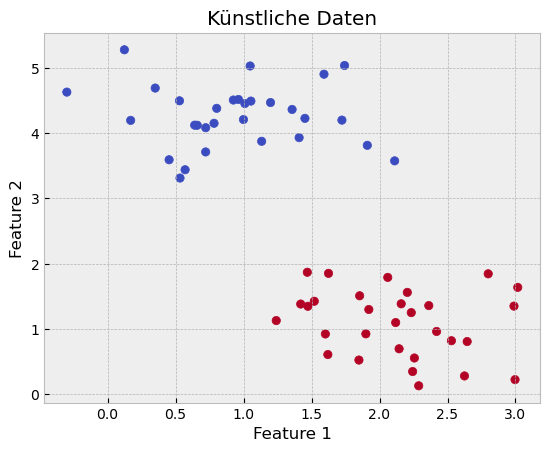

In [2]:
import matplotlib.pylab as plt; plt.style.use('bmh')

fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Künstliche Daten');

Wir können uns jetzt verschiedene Geraden vorstellen, die die blauen Punkte von
den roten Punkten trennen. In der folgenden Grafik sind drei eingezeichnet.
Welche würden Sie nehmen und warum?


```{figure} pics/fig10_01_annotated.pdf
---
width: 600px
name: fig10_01_annotated
---
Drei Geraden trennen die roten von den blauen Punkten, aber welche ist die bessere Wahl?
```

Alle drei Geraden trennen die blauen von den roten Punkten. Jedoch könnte Gerade
3 problematisch werden, wenn beispielsweise ein neuer blauer Datenpunkt an der
Position (2.3, 3.3) dazukäme. Dann würde Gerade 3 diesen Punkt als rot
klassifizieren. Ähnlich verhält es sich mit Gerade 1. Ein neuer blauer
Datenpunkt an der Position (0.5, 3) würde fälschlicherweise als rot
klassifiziert werden. Gerade 2 bietet den sichersten Abstand zu den bereits
vorhandenen Datenpunkten. Wir können diesen "Sicherheitsstreifen" folgendermaßen
visualisieren.


```{figure} pics/fig10_02_annotated.pdf
---
width: 600px
name: fig10_02_annotated
---
Ein Sicherheitsstreifen bzw. breiter Rand, im Englischen **Margin** genannt, trennt die beiden Klassen. 
```

Der Support-Vector-Algorithmus sucht nun die Gerade, die die Datenpunkte mit dem
größten Randabstand (= Margin) voneinander trennt. Im Englischen sprechen wir
daher auch von **Large Margin Classification**. Die Suche nach dieser Geraden
ist dabei etwas zeitaufwändiger als die Berechnung der Gewichte bei der
logistischen Regression. Wenn aber einmal das Modell trainiert ist, ist die
Prognose effizienter, da nur die sogenannten **Stützvektoren**, auf englisch
**Support Vectors** gespeichert und ausgewertet werden. Die Stützvektoren sind
die Vektoren, die vom Ursprung des Koordinatensystems zu den Punkten zeigen, die
auf der Grenze des Sicherheitsbereichs liegen.  

```{figure} pics/fig10_03.pdf
---
width: 600px
name: fig10_03
---
Einige wenige Punkte (gelb markiert) bestimmen den Verlauf des Randabstandes. Die Vektoren, 
die vom Ursprung des Koordinatensystems zu diesen Punkten zeigen, werden Stützvektoren (= Support Vectors) genannt.
```

## Großer, aber weicher Randabstand

Bei dem oben betrachteten Beispiel lassen sich blaue und rote Datenpunkte
komplett voneinander trennen. Für den Fall, dass einige wenige Datenpunkte
"falsch" liegen, erlauben wir Ausnahmen. Wie viele Ausnahmen wir erlauben
wollen, die im Sicherheitsstreifen liegen, steuern wir mit dem Parameter `C`.
Ein großes `C` bedeutet, dass wir eine große Mauer an den Grenzen des
Sicherheitsabstandes errichten. Es kommt kaum vor, dass Datenpunkte innerhalb
des Margins liegen. Je kleiner `C` wird, desto mehr Datenpunkte sind innerhalb
des Sicherheitsbereichs erlaubt. 

Im Folgenden betrachten wir einen neuen künstlichen Datensatz, bei dem die
blauen von den roten Punkte nicht mehr ganz so stark getrennt sind. Schauen Sie
sich die fünf verschiedenen Margins an, die entstehen, wenn der Parameter `C`
variiert wird. 

````{carousel}
:show_controls:
:show_shadows:

```{figure} pics/fig10_04a.pdf

```
```{figure} pics/fig10_04b.pdf

```
```{figure} pics/fig10_04c.pdf

```
```{figure} pics/fig10_04d.pdf

```
```{figure} pics/fig10_04e.pdf

```
````

## Zusammenfassung

In diesem Abschnitt haben wir die Ideen kennengelernt, die den Support Vector
Machines zugrunde liegen. Im nächsten Abschnitt schauen wir uns an, wie ein
SVM-Modell mit Scikit-Learn trainiert wird.